# Library Imports
- This will import all necessary libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# sets up the data sets to be used
old_data = pd.read_csv('data/Illinois_Population__1991-1999.csv')
new_data = pd.read_csv('data/Illinois_Population__2000-2009.csv')

## Helper Functions in the Code Cells Below

In [3]:
# returns the first row in CSV (the header)

def return_year_list(data_set):
    first_row = list(data_set.head(1))[1:]
    return np.array(list(map(int, first_row)))

In [4]:
def newFunc():
    

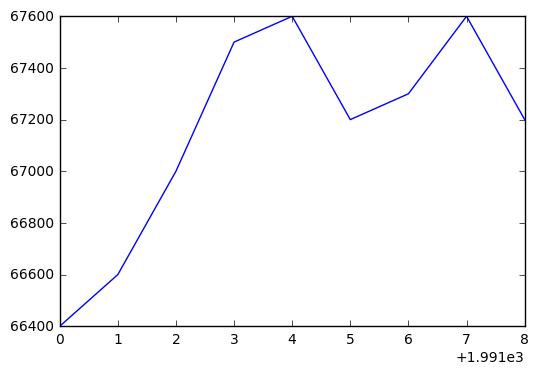

In [12]:
x_axis = return_year_list(old_data)
# print(years)

row = list(old_data.loc[1])
city_name = row[0]
city_pop = row[1:]
# print(city_name)
# print(city_pop)
# x = list(old_data['County'])

# print(x)
# arr = list(old_data.loc[1])[1:]
# print(arr)
plt.plot(x_axis, city_pop)
# plt.xticks(x_axis, size='small')
plt.show()
# old_data

In [ ]:
old_data